# Robot task space capacity evaluation

<img src = "https://gitlab.inria.fr/auctus-team/people/antunskuric/pycapacity/-/raw/master/images/robot.png" height="200px">

In [1]:
import numpy as np

import pycapacity.robot as capacity # robot capacity module
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex  # visualistion tools
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

## Four link planar robot example

Force polytope and ellispoid example calculaton using the newly developed force capacity calculation python module

`n=4` and `m=2`

In [2]:
# jacobian function for four link planar robot
def four_link_jacobian(joints):
    sq1 = np.sin(joints[0])
    sq12 = np.sin(joints[0] + joints[1])
    sq123 = np.sin(joints[0] + joints[1] + joints[2])
    sq1234 = np.sin(joints[0] + joints[1] + joints[2] + joints[3])
    cq1 = np.cos(joints[0])
    cq12 = np.cos(joints[0] + joints[1])
    cq123 = np.cos(joints[0] + joints[1] + joints[2])
    cq1234 = np.cos(joints[0] + joints[1] + joints[2] + joints[3])
    return np.array([[0.5*cq1+0.5*cq12+0.5*cq123+0.3*cq1234, 0.5*cq12+0.5*cq123+0.3*cq1234, 0.5*cq123+0.7*cq1234, +0.3*cq1234], [-0.5*sq1-0.5*sq12-0.5*sq123-0.3*sq1234, -0.5*sq12-0.5*sq123-0.3*sq1234, -0.5*sq123-0.3*sq1234, -0.3*sq1234]])
# inertia matrix of a four link planar robot
def four_link_inertia(joints):
    sq1 = np.sin(joints[1])
    cq1 = np.cos(joints[1])
    sq2 = np.sin(joints[2])
    cq2 = np.cos(joints[2])
    sq3 = np.sin(joints[3])
    cq3 = np.cos(joints[3])
    return np.reshape([cq1*(5.0/8.0)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/8.0)+(cq2*cq3)/8.0-sq1*sq2*(3.0/8.0)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/8.0-(cq1*sq2*sq3)/8.0-(cq2*sq1*sq3)/8.0-(cq3*sq1*sq2)/8.0+7.0/8.0,cq1*(5.0/1.6e+1)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/8.0-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.5e+1/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/1.6e+1-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+3.0/1.6e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.0/3.2e+1,cq1*(5.0/1.6e+1)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/8.0-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.5e+1/3.2e+1,cq2*(3.0/8.0)+cq3/8.0+(cq2*cq3)/8.0-(sq2*sq3)/8.0+1.5e+1/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+3.0/1.6e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+1.0/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/1.6e+1-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+3.0/1.6e+1,cq2*(3.0/1.6e+1)+cq3/8.0+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+3.0/1.6e+1,cq3/8.0+3.0/1.6e+1,cq3/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+1.0/3.2e+1,1.0/3.2e+1],[4,4]);

def four_link_robot_plot(joints):
    L = [0, 0.5,0.5,0.5,0.3]
    x = np.zeros((2,1))
    for i in range(5):
        sq = np.sum(joints[:i])
        x = np.hstack((x, x[:,-1].reshape(2,1)+ L[i]*np.array([[np.sin(sq)], [np.cos(sq)]])));
    return x

## Force polytope and manipulability ellipsoid

In [3]:
# joint positions q
q  = np.random.rand(4)*np.pi/3*2-1
# joint torque limits tau
tau_min = -np.ones((4,1))
tau_max = np.ones((4,1))

# find robot position
# a bit of scaling
robot_position = four_link_robot_plot(q)*5 

# jacobian
J = four_link_jacobian(q)
# calculate the velocity polytope
f_vert, faces_indices = capacity.force_polytope_withfaces(J,tau_min,tau_max)
faces = capacity.face_index_to_vertex(f_vert, faces_indices)

# calculate the velocity ellipsoid
S,U = capacity.force_ellipsoid(J, tau_max)

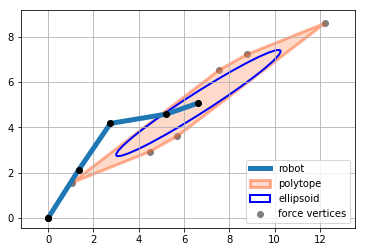

In [4]:
# visualise polytope ellispoid
fig = plt.figure(12)
ax = fig.gca()
#plot the robot
plt.plot(robot_position[0,:],robot_position[1,:],linewidth=5, label="robot")
plt.plot(robot_position[0,:],robot_position[1,:],'ko',linewidth=5)
#plot the polytope
f_vert = f_vert + robot_position[:,-1].reshape(2,1)
faces = np.array(faces)  + robot_position[:,-1].reshape(2,1)
plot_polytope_faces(ax=ax,faces=faces,face_color='lightsalmon', edge_color='orangered',label='polytope')
plot_polytope_vertex(ax=ax,vertex=f_vert,label="force vertices",color='gray')
#plt.fill(faces[0],faces[1], alpha=0.4, facecolor='lightsalmon', edgecolor='orangered', linewidth=3,label='polytope')
# ellipsoid
ellipse = Ellipse(xy=(robot_position[0,-1], robot_position[1,-1]), width=2*S[1], height=2*S[0], 
                        edgecolor='b', fc='None', lw=2, angle=-np.arctan2(U[0,0],U[0,1])*180/np.pi,label='ellipsoid')
ax.add_patch(ellipse)
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

## Acceleration polytope and acceleration ellipsoid

In [5]:
##### joint positions q
q  = np.random.rand(4)*np.pi/2
# joint torque limits tau
tau_min = -np.ones((4,1))
tau_max = np.ones((4,1))

# find robot position
# a bit of scaling
robot_position = four_link_robot_plot(q)*50 

# jacobian
J = four_link_jacobian(q)
# jacobian
M = four_link_inertia(q)
# calculate the acceleration polytope
acc_vert, faces_indices = capacity.acceleration_polytope_withfaces(J, M, tau_min ,tau_max)
faces = capacity.face_index_to_vertex(acc_vert, faces_indices)

# calculate the acceleration ellipsoid
S,U = capacity.acceleration_ellipsoid(J, M, tau_max)

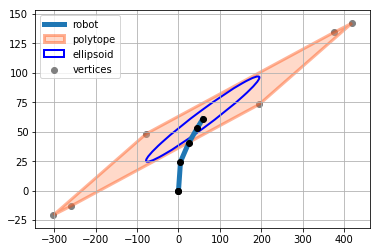

In [6]:
# visualise polytope ellispoid
fig = plt.figure(13)
ax = plt.gca()

#plot the robot
plt.plot(robot_position[0,:],robot_position[1,:],linewidth=5, label="robot")
plt.plot(robot_position[0,:],robot_position[1,:],'ko',linewidth=5)
#plot the polytope
acc_vert = acc_vert + robot_position[:,-1].reshape(2,1)
faces = np.array(faces)  + robot_position[:,-1].reshape(2,1)
plot_polytope_faces(ax=plt,faces=faces,face_color='lightsalmon', edge_color='orangered',label='polytope')
plot_polytope_vertex(ax=ax,vertex=acc_vert,label="vertices",color='gray')

# ellipsoid
ellipse = Ellipse(xy=(robot_position[0,-1], robot_position[1,-1]), width=2*S[1], height=2*S[0], 
                        edgecolor='b', fc='None', lw=2, angle=-np.arctan2(U[0,0],U[0,1])*180/np.pi,label='ellipsoid')
ax.add_patch(ellipse)
plt.grid()
plt.legend()
plt.show()

## Velocity polytope and manipulability ellipsoid

In [7]:
##### joint positions q
q  = np.random.rand(4)*np.pi/3*2-1
# joint torque limits tau
dq_min = -np.ones((4,1))
dq_max = np.ones((4,1))

# find robot position
# a bit of scaling
robot_position = four_link_robot_plot(q)*5

# jacobian
J = four_link_jacobian(q)
# calculate the force polytope
vel_vert, faces_indices = capacity.velocity_polytope_withfaces(J, dq_min ,dq_max)
faces = capacity.face_index_to_vertex(vel_vert, faces_indices)

# calculate the force ellipsoid
S,U = capacity.velocity_ellipsoid(J, dq_max)

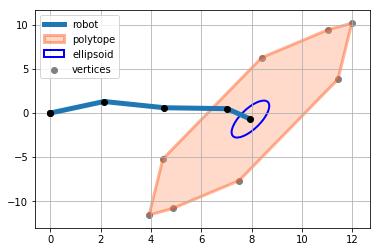

In [8]:
# visualise polytope ellipsoid
fig = plt.figure(14)
ax = plt.gca()

#plot the robot
plt.plot(robot_position[0,:],robot_position[1,:],linewidth=5, label="robot")
plt.plot(robot_position[0,:],robot_position[1,:],'ko',linewidth=5)
#plot the polytope
vel_vert = vel_vert + robot_position[:,-1].reshape(2,1)
faces = np.array(faces)  + robot_position[:,-1].reshape(2,1)

plot_polytope_faces(ax=plt,faces=faces,face_color='lightsalmon', edge_color='orangered',label='polytope')
plot_polytope_vertex(ax=ax,vertex=vel_vert,label="vertices",color='gray')
# ellipsoid
ellipse = Ellipse(xy=(robot_position[0,-1], robot_position[1,-1]), width=2*S[1], height=2*S[0], 
                        edgecolor='b', fc='None', lw=2, angle=-np.arctan2(U[0,0],U[0,1])*180/np.pi,label='ellipsoid')
ax.add_patch(ellipse)
plt.grid()
plt.legend()
plt.show()

## Generic 3D robot example
`m=3`
Define jacobian matrix and torque limits

In [9]:
m = 3 # 3d forces
n = 6 # robot dof 
J = np.array(np.random.rand(m,n))
# torque limits
t_min = -10*np.ones(n)
t_max = 10*np.ones(n)
# velocity limits
dq_min = -5*np.ones(n)
dq_max = 5*np.ones(n)

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [10]:
f_vert, faces_indices = capacity.force_polytope_withfaces(J,t_max,t_min)
faces_force = capacity.face_index_to_vertex(f_vert, faces_indices)

Calculate the velocity polytope vertices
```
v = J dq
s.t. dq_min <  dq < dq_max
```

In [11]:
vel_vert, faces_indices = capacity.velocity_polytope_withfaces(J,dq_max,dq_min)
faces_velocity = capacity.face_index_to_vertex(vel_vert, faces_indices)

Visualise the vertices force and velocity polytopes: `f_vert` and `vel_vert`

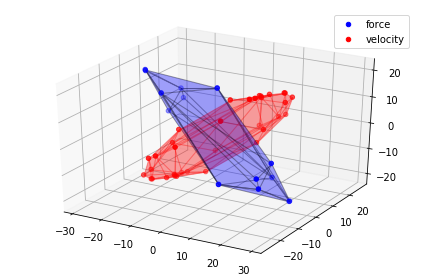

In [12]:
fig = plt.figure(1)

# plot polygones
ax = plot_polytope_faces(plt=plt, faces=faces_force, face_color='blue', edge_color='black',alpha=0.2)
plot_polytope_vertex(ax=ax, vertex=f_vert,label='force',color='blue')
    
# plot polygones
plot_polytope_faces(ax=ax, faces=faces_velocity, face_color='red', edge_color='red',alpha=0.2)
plot_polytope_vertex(ax=ax, vertex=vel_vert, label='velocity',color='red')

plt.tight_layout()
plt.legend()
plt.show()

## Intersection example
`m=3`
Define jacobian matrix and torque limits

In [13]:
m = 3 # 3d forces
n = 6 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones(n)
t_max = -np.ones(n)

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [14]:
f_vert1, faces_indices = capacity.force_polytope_withfaces(J1, t_max, t_min)
polytopes1 = capacity.face_index_to_vertex(f_vert1, faces_indices)
f_vert2, faces_indices = capacity.force_polytope_withfaces(J2, t_max, t_min)
polytopes2 = capacity.face_index_to_vertex(f_vert2, faces_indices)
f_vert_int, faces_indices = capacity.force_polytope_intersection_withfaces(J1,J2,t_max,t_min,t_max,t_min)
polytopes_int = capacity.face_index_to_vertex(f_vert_int, faces_indices)

Visualise the vertices `f_vert`

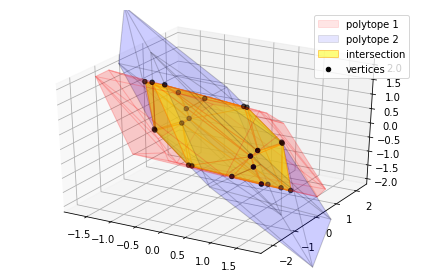

In [15]:
fig = plt.figure(2)

# polytope1
ax = plot_polytope_faces(plt=plt,faces=polytopes1, face_color='red', edge_color='red',label='polytope 1', alpha=0.1)
# polytope2
plot_polytope_faces(ax=ax,faces=polytopes2, face_color='blue', edge_color='black',label='polytope 2', alpha=0.1)
# intersection polytope
plot_polytope_faces(ax=ax, faces=polytopes_int, face_color='yellow', edge_color='orange',label='intersection', alpha=0.5)
plot_polytope_vertex(ax=ax, vertex=f_vert_int,label='vertices')
    

ax.autoscale(enable=True) 
fig.tight_layout()
plt.legend()
plt.show()

## Minkowski sum example
`m=3`
Define jacobian matrix and torque limits

In [16]:
m = 2 # 3d forces
n = 4 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones(n)
t_max = -np.ones(n)

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [17]:
f_vert1, faces_indices = capacity.force_polytope_withfaces(J1, t_max, t_min)
polytopes1 = capacity.face_index_to_vertex(f_vert1, faces_indices)
f_vert2, faces_indices = capacity.force_polytope_withfaces(J2, t_max, t_min)
polytopes2 = capacity.face_index_to_vertex(f_vert2, faces_indices)
f_vert_int, faces_indices = capacity.force_polytope_sum_withfaces(J1, J2, t_max, t_min, t_max, t_min)
polytopes_int = capacity.face_index_to_vertex(f_vert_int, faces_indices)

Visualise the vertices `f_vert`

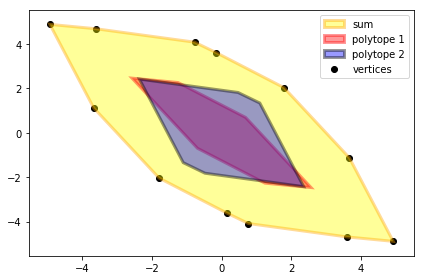

In [18]:
fig = plt.figure(3)

# minkowski sum polytope
ax = plot_polytope_faces(plt=plt, faces=polytopes_int, face_color='yellow', edge_color='orange',label='sum', alpha=0.2)
plot_polytope_vertex(ax=ax, vertex=f_vert_int,label='vertices',color='black')
    
# polytope1
plot_polytope_faces(ax=ax, faces=polytopes1, face_color='red', edge_color='red',label='polytope 1', alpha=0.3)
# polytope2
plot_polytope_faces(ax=ax, faces=polytopes2, face_color='blue', edge_color='black',label='polytope 2', alpha=0.3)


ax.autoscale(enable=True) 
fig.tight_layout()
plt.legend()
plt.show()

# Human model polytope evaluation

A simple example program 3d force polytope 
evaluation of a randomised 30 muscle 7dof 
human musculoskeletal model 


<img src = "https://gitlab.inria.fr/auctus-team/people/antunskuric/pycapacity/-/raw/master/images/bimanual1.png" height="200px">

In [19]:
import pycapacity.human as capacity
import numpy as np

L = 30 # muscles
n = 6 # joint number - dof
m = 3 # 3d forces

J = np.array(np.random.rand(m,n))*2-1 # random jacobian matrix
N = np.array(np.random.rand(n,L))*2-1 # random moment arm matrix

F_max = 100*np.ones(L)  # muscle forces limits max and min
F_min = np.zeros(L)

dl_max = 10*np.ones(L)  # muscle contraction velocity limits max and min
dl_min = -10*np.ones(L)

# force polytope
f_vert, H,d, faces = capacity.force_polytope(J,N, F_min, F_max, 10) # cal culate the polytope vertices and faces
faces_force = capacity.face_index_to_vertex(f_vert, faces)

# velocity polytope
vel_vert, H,d, faces = capacity.velocity_polytope(J,N, dl_min, dl_max,0.5) # cal culate the polytope vertices and faces
vel_vert = vel_vert*20 # a bit of scaling for visualisaion
faces_vel = capacity.face_index_to_vertex(vel_vert, faces)

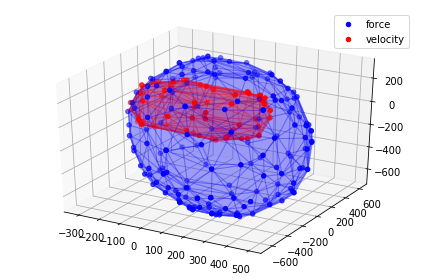

In [20]:
fig = plt.figure(4)

# plot polygones
ax = plot_polytope_vertex(plt=plt, vertex=f_vert, label='force',color='blue')
plot_polytope_faces(ax=ax, faces=faces_force, face_color='blue', edge_color='blue', alpha=0.2)

plot_polytope_faces(ax=ax,faces=faces_vel, face_color='red', edge_color='red', alpha=0.2)
plot_polytope_vertex(ax=ax, vertex=vel_vert, label='velocity',color='red')


plt.tight_layout()
plt.legend()
plt.show()